# Lab 9- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the SUSY dataset
filename = "SUSY-small.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", 
            "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", 
            "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", 
            "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [5]:
N_Max = 500000
N_Train = 50000  
Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:N_Max]

X_Train = np.array(Train_Sample[VarNames[1:]])
y_Train = np.array(Train_Sample["signal"])
X_Test = np.array(Test_Sample[VarNames[1:]])
y_Test = np.array(Test_Sample["signal"])

## Exercise 1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs. 
* Compare the performance on training versus test sample. Are you over training?

In [10]:
from tensorflow.keras.layers import Input

def create_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Explicitly define the input shape
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create the model
input_dim = X_Train.shape[1]
model = create_model(input_dim)

# Train the model
history = model.fit(
    X_Train, y_Train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6996 - loss: 0.5650 - val_accuracy: 0.7916 - val_loss: 0.4493
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.7829 - loss: 0.4618 - val_accuracy: 0.7942 - val_loss: 0.4437
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.7864 - loss: 0.4554 - val_accuracy: 0.7942 - val_loss: 0.4429
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7922 - loss: 0.4508 - val_accuracy: 0.7954 - val_loss: 0.4391
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7905 - loss: 0.4497 - val_accuracy: 0.7965 - val_loss: 0.4390
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.7962 - loss: 0.4434 - val_accuracy: 0.7954 - val_loss: 0.4416
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.7888 - loss: 0.4501 - val_accuracy: 0.7969 - val_loss: 0.4364
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7940 - loss: 0.4439 - val_

In [14]:
def create_model_deeper(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train deeper model
model2 = create_model_deeper(input_dim)
history2 = model2.fit(
    X_Train, y_Train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6914 - loss: 0.5681 - val_accuracy: 0.7876 - val_loss: 0.4507
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7767 - loss: 0.4723 - val_accuracy: 0.7952 - val_loss: 0.4451
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.4560 - val_accuracy: 0.7960 - val_loss: 0.4421
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.4496 - val_accuracy: 0.7953 - val_loss: 0.4443
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.4544 - val_accuracy: 0.7965 - val_loss: 0.4403


In [15]:
def create_model_tanh(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='tanh'),
        Dropout(0.2),
        Dense(64, activation='tanh'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train tanh-activated model
model3 = create_model_tanh(input_dim)
history3 = model3.fit(
    X_Train, y_Train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6880 - loss: 0.5741 - val_accuracy: 0.7893 - val_loss: 0.4583
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7759 - loss: 0.4765 - val_accuracy: 0.7944 - val_loss: 0.4505
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.7821 - loss: 0.4661 - val_accuracy: 0.7959 - val_loss: 0.4466
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7862 - loss: 0.4565 - val_accuracy: 0.7954 - val_loss: 0.4444
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7874 - loss: 0.4536 - val_accuracy: 0.7966 - val_loss: 0.4432


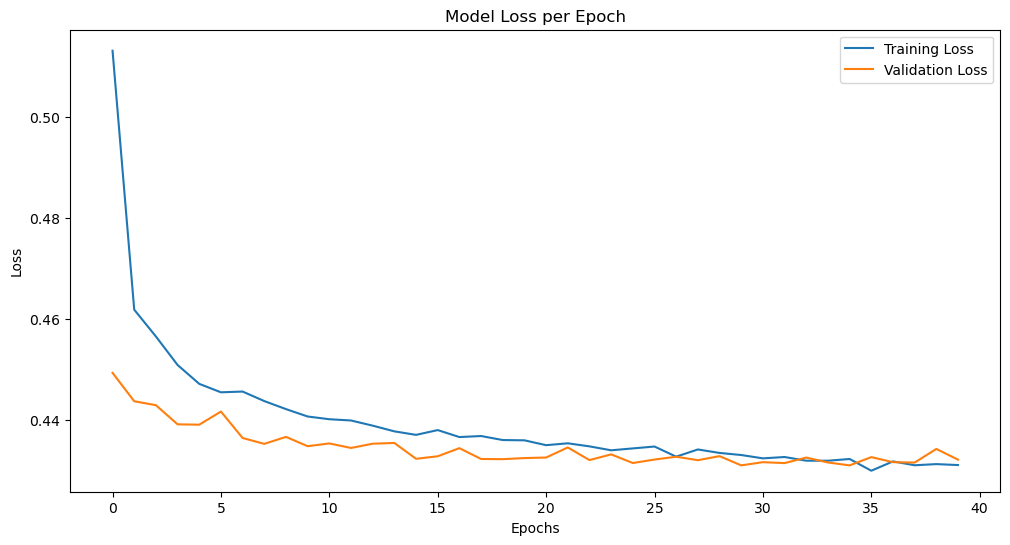

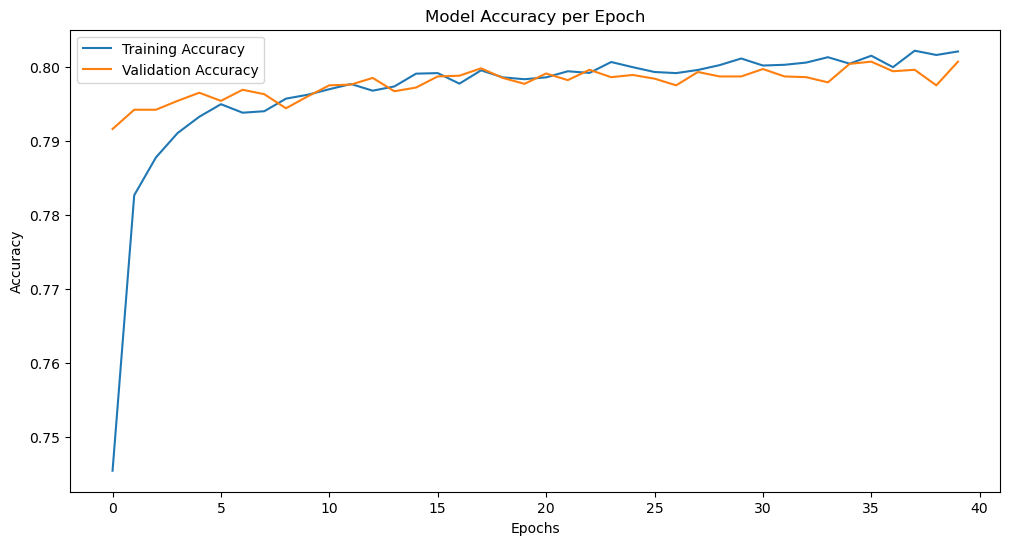

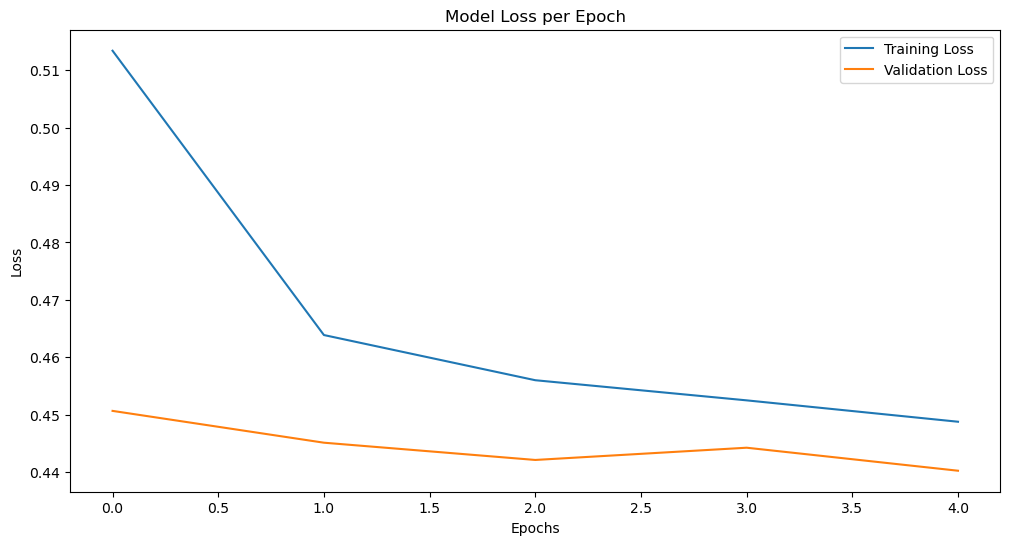

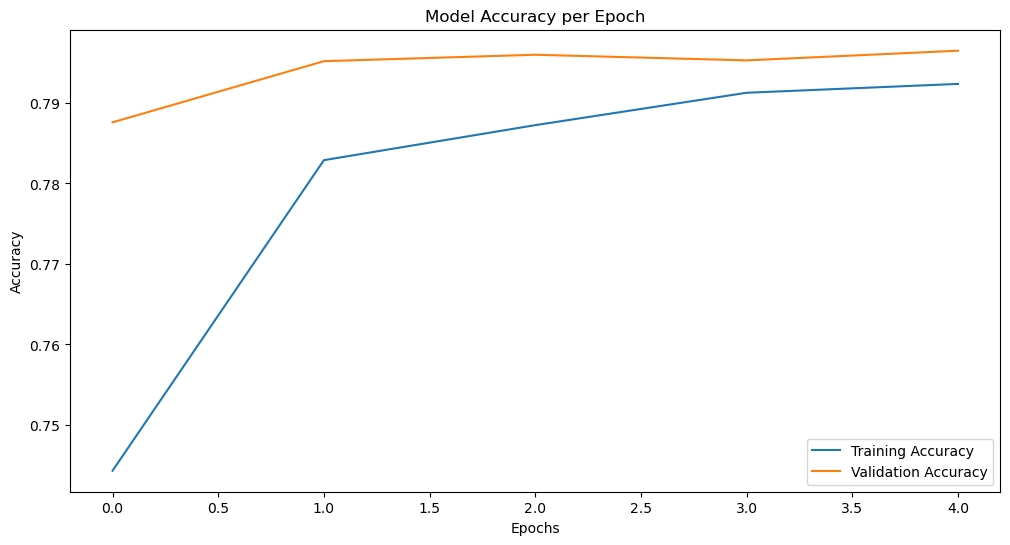

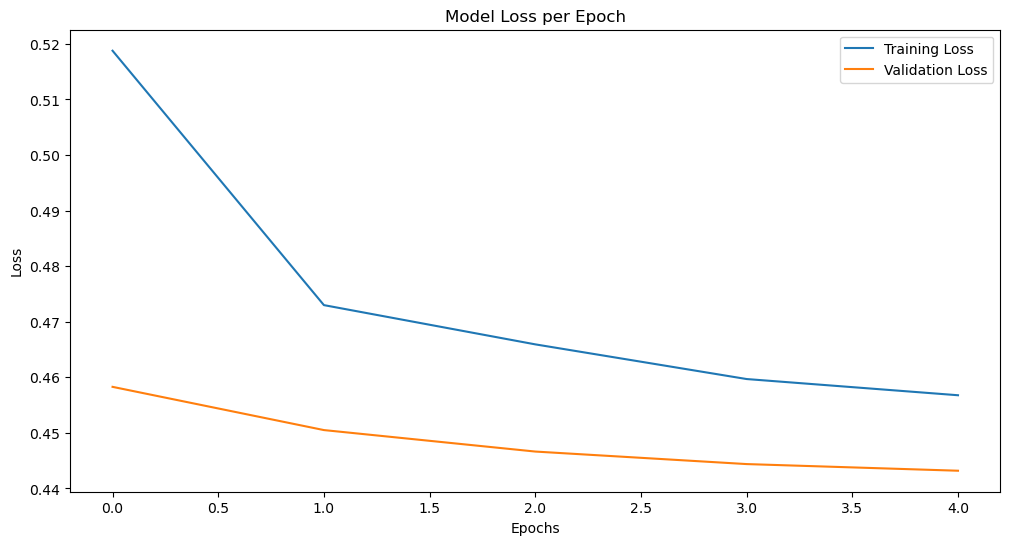

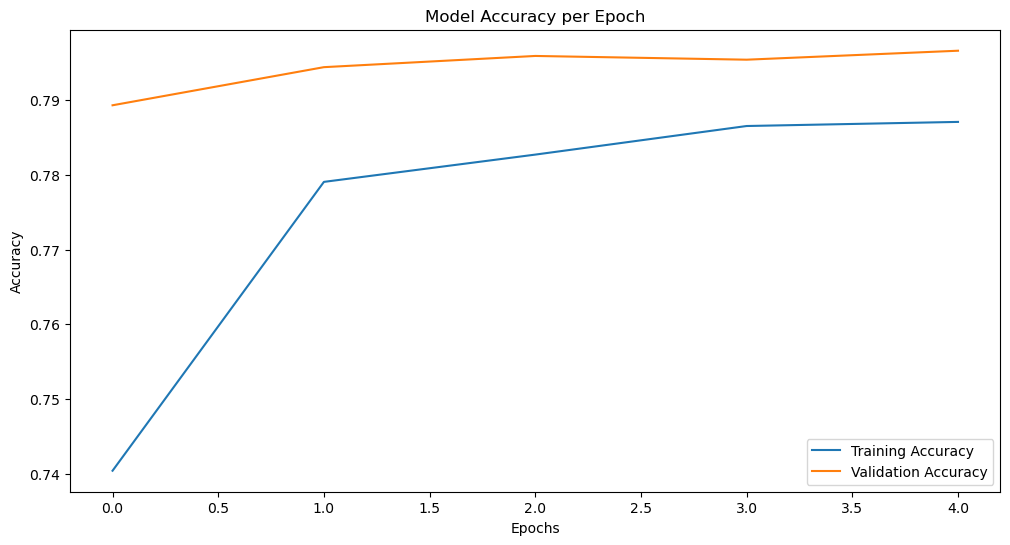

In [17]:
def plot_training_history(history):
    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Call the function to plot history
plot_training_history(history)
plot_training_history(history2)
plot_training_history(history3)

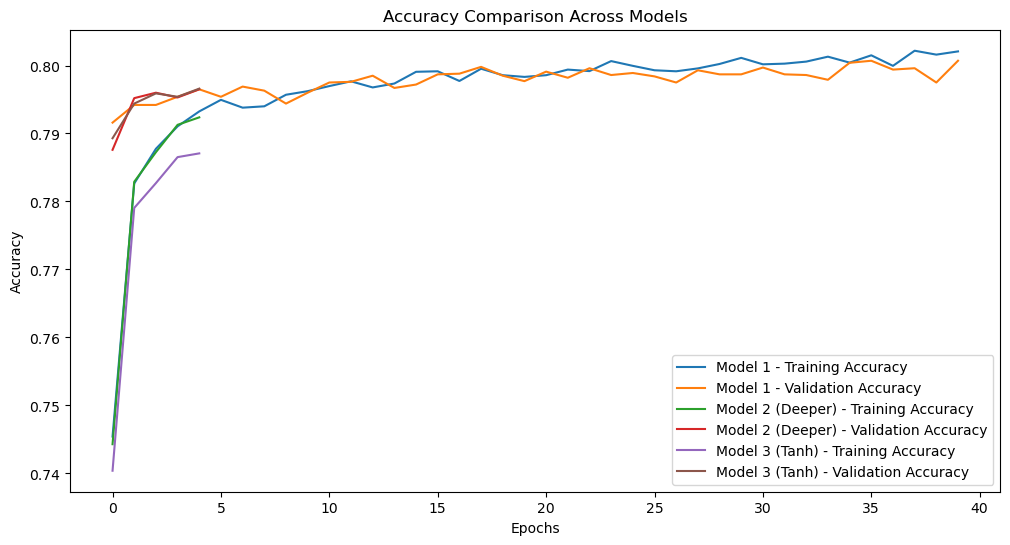

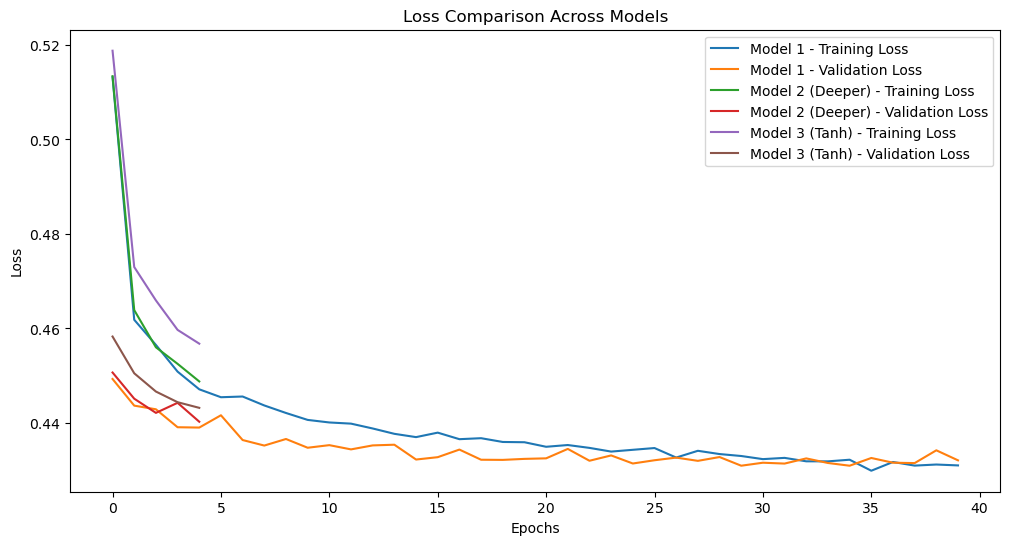

In [18]:
# Combined Accuracy Comparison
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Model 1 - Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Model 1 - Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Model 2 (Deeper) - Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 (Deeper) - Validation Accuracy')
plt.plot(history3.history['accuracy'], label='Model 3 (Tanh) - Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Model 3 (Tanh) - Validation Accuracy')
plt.title('Accuracy Comparison Across Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Combined Loss Comparison
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Model 1 - Training Loss')
plt.plot(history.history['val_loss'], label='Model 1 - Validation Loss')
plt.plot(history2.history['loss'], label='Model 2 (Deeper) - Training Loss')
plt.plot(history2.history['val_loss'], label='Model 2 (Deeper) - Validation Loss')
plt.plot(history3.history['loss'], label='Model 3 (Tanh) - Training Loss')
plt.plot(history3.history['val_loss'], label='Model 3 (Tanh) - Validation Loss')
plt.title('Loss Comparison Across Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# Evaluate all models on test set
train_loss1, train_accuracy1 = model.evaluate(X_Train, y_Train, verbose=0)
test_loss1, test_accuracy1 = model.evaluate(X_Test, y_Test, verbose=0)

train_loss2, train_accuracy2 = model2.evaluate(X_Train, y_Train, verbose=0)
test_loss2, test_accuracy2 = model2.evaluate(X_Test, y_Test, verbose=0)

train_loss3, train_accuracy3 = model3.evaluate(X_Train, y_Train, verbose=0)
test_loss3, test_accuracy3 = model3.evaluate(X_Test, y_Test, verbose=0)

print(f"Model 1 - Training Accuracy: {train_accuracy1:.4f}, Test Accuracy: {test_accuracy1:.4f}")
print(f"Model 2 (Deeper) - Training Accuracy: {train_accuracy2:.4f}, Test Accuracy: {test_accuracy2:.4f}")
print(f"Model 3 (Tanh) - Training Accuracy: {train_accuracy3:.4f}, Test Accuracy: {test_accuracy3:.4f}")

Model 1 - Training Accuracy: 0.8036, Test Accuracy: 0.8002
Model 2 (Deeper) - Training Accuracy: 0.7890, Test Accuracy: 0.7903
Model 3 (Tanh) - Training Accuracy: 0.7872, Test Accuracy: 0.7887


## Exercise 2

Following the original paper (see lab 7), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

In [55]:
# Define the complete list of high-level features (used for model2 and model3)
high_level_features = [
    "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
    "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2",
    "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"
]

# Extract high-level features for model2
X_Test_features = Test_Sample[high_level_features].to_numpy()

# Combine raw data and feature data for model3
X_Test_combined = np.hstack((X_Test, X_Test_features))

# Check shapes to ensure compatibility
print(f"model1 expected input shape: {model.input_shape}")
print(f"model2 expected input shape: {model2.input_shape}")
print(f"model3 expected input shape: {model3.input_shape}")
print(f"X_Test shape: {X_Test.shape}")
print(f"X_Test_features shape: {X_Test_features.shape}")
print(f"X_Test_combined shape: {X_Test_combined.shape}")


model1 expected input shape: (None, 18)
model2 expected input shape: (None, 18)
model3 expected input shape: (None, 18)
X_Test shape: (450000, 18)
X_Test_features shape: (450000, 18)
X_Test_combined shape: (450000, 36)


In [57]:
y_pred_prob1 = model.predict(X_Test).ravel()  # Get predicted probabilities
fpr1, tpr1, _ = roc_curve(y_Test, y_pred_prob1)  # Calculate FPR and TPR
roc_auc1 = auc(fpr1, tpr1)  # Calculate AUC

y_pred_prob2 = model2.predict(X_Test).ravel()
fpr2, tpr2, _ = roc_curve(y_Test, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)

y_pred_prob3 = model3.predict(X_Test).ravel()
fpr3, tpr3, _ = roc_curve(y_Test, y_pred_prob3)
roc_auc3 = auc(fpr3, tpr3)




14063/14063 ━━━━━━━━━━━━━━━━━━━━ 3s 225us/step
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 4s 273us/step
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 3s 223us/step


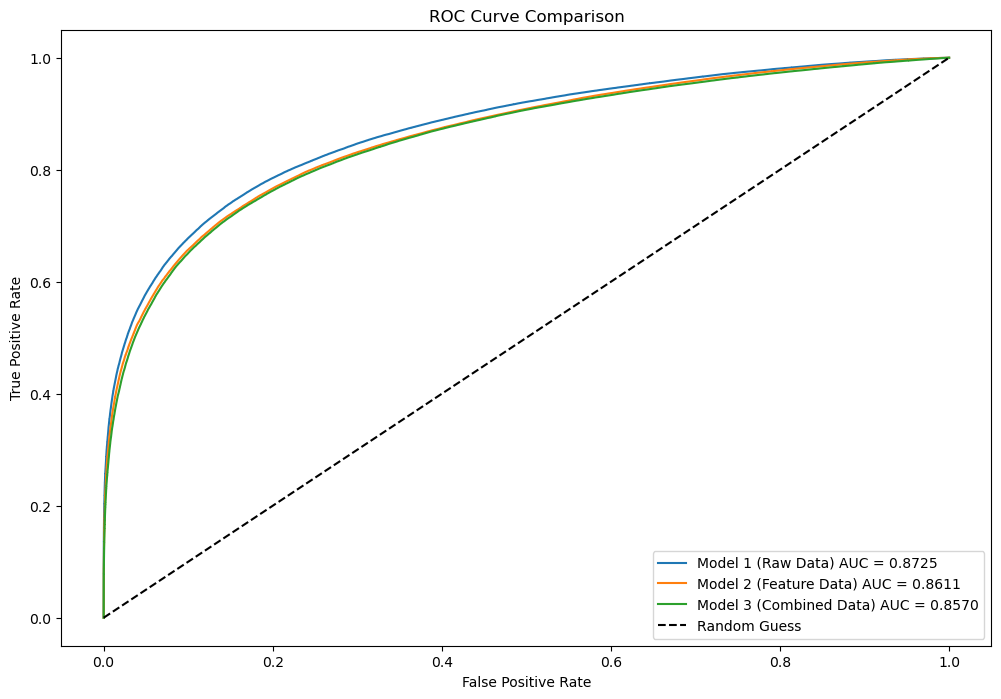

Model 1 (Raw Data) AUC: 0.8725
Model 2 (Feature Data) AUC: 0.8611
Model 3 (Combined Data) AUC: 0.8570


In [58]:
# Plot the ROC curves for all three models
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot the ROC curve for model1 (raw data)
plt.plot(fpr1, tpr1, label=f"Model 1 (Raw Data) AUC = {roc_auc1:.4f}")

# Plot the ROC curve for model2 (features data)
plt.plot(fpr2, tpr2, label=f"Model 2 (Feature Data) AUC = {roc_auc2:.4f}")

# Plot the ROC curve for model3 (combined data)
plt.plot(fpr3, tpr3, label=f"Model 3 (Combined Data) AUC = {roc_auc3:.4f}")

# Add a random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add titles and labels
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

# Show the plot
plt.show()

# Print AUC scores for comparison
print(f"Model 1 (Raw Data) AUC: {roc_auc1:.4f}")
print(f"Model 2 (Feature Data) AUC: {roc_auc2:.4f}")
print(f"Model 3 (Combined Data) AUC: {roc_auc3:.4f}")


## Exercise 3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_model_a(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_a = create_model_a(X_Train.shape[1])
history_a = model_a.fit(X_Train, y_Train, validation_split=0.2, epochs=50, batch_size=256, verbose=1)


Epoch 1/50


/Users/aelroezewdie/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6839 - loss: 0.5801 - val_accuracy: 0.7862 - val_loss: 0.4554
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7787 - loss: 0.4672 - val_accuracy: 0.7934 - val_loss: 0.4449
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7869 - loss: 0.4577 - val_accuracy: 0.7934 - val_loss: 0.4451
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.7924 - loss: 0.4476 - val_accuracy: 0.7975 - val_loss: 0.4402
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.7889 - loss: 0.4505 - val_accuracy: 0.7952 - val_loss: 0.4399
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7916 - loss: 0.4443 - val_accuracy: 0.7982 - val_loss: 0.4376
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7943 - loss: 0.4436 - val_accuracy: 0.7980 - val_loss: 0.4369
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.7912 - loss: 0.4470 - val_accuracy: 0.7980 

In [60]:
def create_model_b(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_b = create_model_b(X_Train.shape[1])
history_b = model_b.fit(X_Train, y_Train, validation_split=0.2, epochs=50, batch_size=256, verbose=1)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6779 - loss: 0.5776 - val_accuracy: 0.7916 - val_loss: 0.4466
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7851 - loss: 0.4639 - val_accuracy: 0.7950 - val_loss: 0.4417
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.4593 - val_accuracy: 0.7966 - val_loss: 0.4392
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.4587 - val_accuracy: 0.7961 - val_loss: 0.4384
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4483 - val_accuracy: 0.7976 - val_loss: 0.4385
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4472 - val_accuracy: 0.7981 - val_loss: 0.4365
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4442 - val_accuracy: 0.7988 - val_loss: 0.4373
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.4427 - val_accuracy: 0.

In [61]:
from tensorflow.keras.optimizers import SGD

def create_model_c(input_dim):
    model = Sequential([
        Dense(128, activation='tanh', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(64, activation='tanh'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])
    return model

model_c = create_model_c(X_Train.shape[1])
history_c = model_c.fit(X_Train, y_Train, validation_split=0.2, epochs=50, batch_size=256, verbose=1)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5156 - loss: 0.2633 - val_accuracy: 0.6715 - val_loss: 0.2261
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.6157 - loss: 0.2293 - val_accuracy: 0.7705 - val_loss: 0.2029
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6835 - loss: 0.2102 - val_accuracy: 0.7752 - val_loss: 0.1889
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.7198 - loss: 0.1971 - val_accuracy: 0.7767 - val_loss: 0.1795
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.7291 - loss: 0.1884 - val_accuracy: 0.7798 - val_loss: 0.1729
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7408 - loss: 0.1818 - val_accuracy: 0.7812 - val_loss: 0.1680
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7454 - loss: 0.1786 - val_accuracy: 0.7821 - val_loss: 0.1644
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7522 - loss: 0.1736 - val_accura

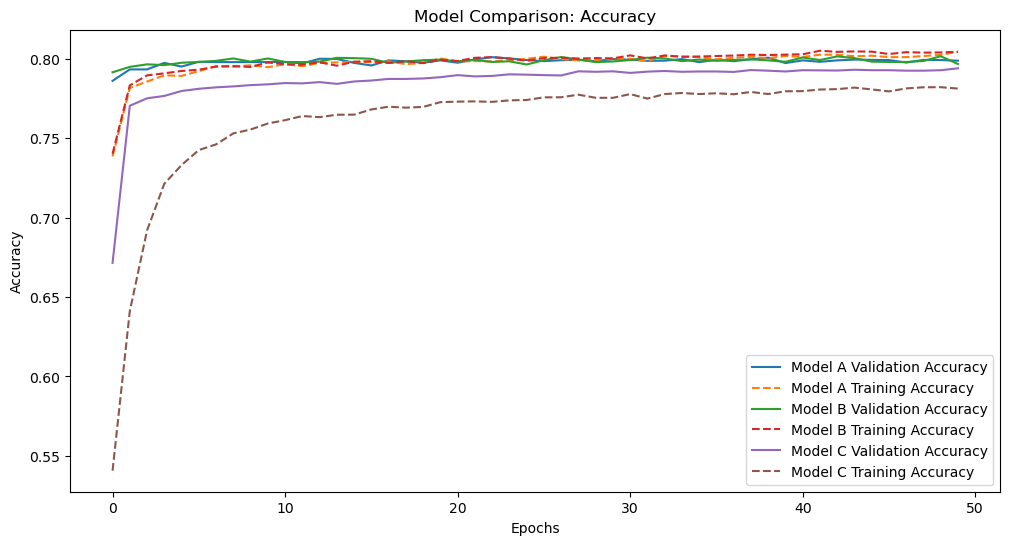

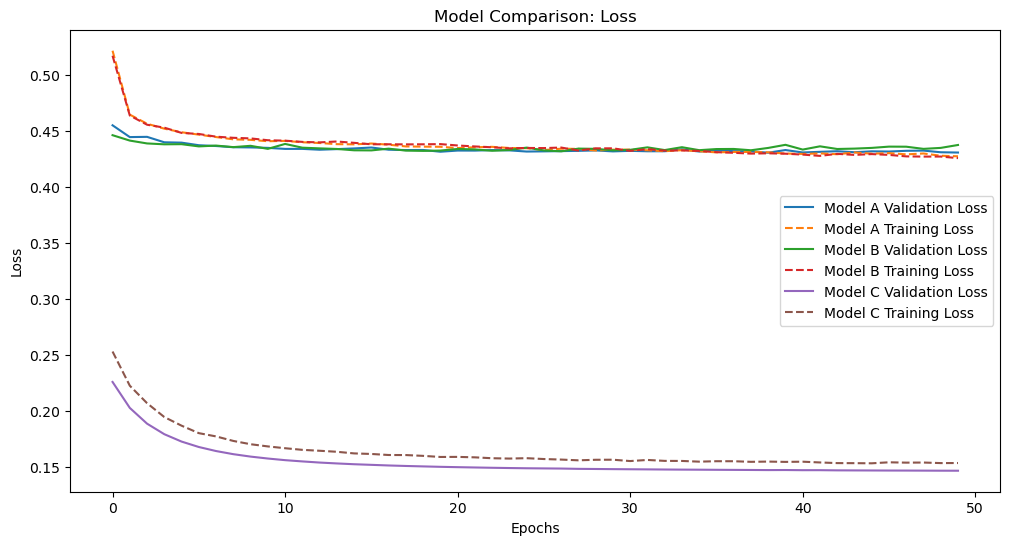

In [62]:
import matplotlib.pyplot as plt

def plot_history(histories, model_names):
    plt.figure(figsize=(12, 6))
    
    # Plot accuracy
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')
        plt.plot(history.history['accuracy'], label=f'{name} Training Accuracy', linestyle='dashed')
    
    plt.title("Model Comparison: Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
    # Plot loss
    plt.figure(figsize=(12, 6))
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')
        plt.plot(history.history['loss'], label=f'{name} Training Loss', linestyle='dashed')
    
    plt.title("Model Comparison: Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plot_history([history_a, history_b, history_c], ['Model A', 'Model B', 'Model C'])


## Exercise 4

Repeat exercise 4 from Lab 8, adding your best performing DNN as one of the models.  


Evaluating Support Vector Machine...
Evaluating Random Forest...
Evaluating Naive Bayes...
Evaluating Deep Neural Network...
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step


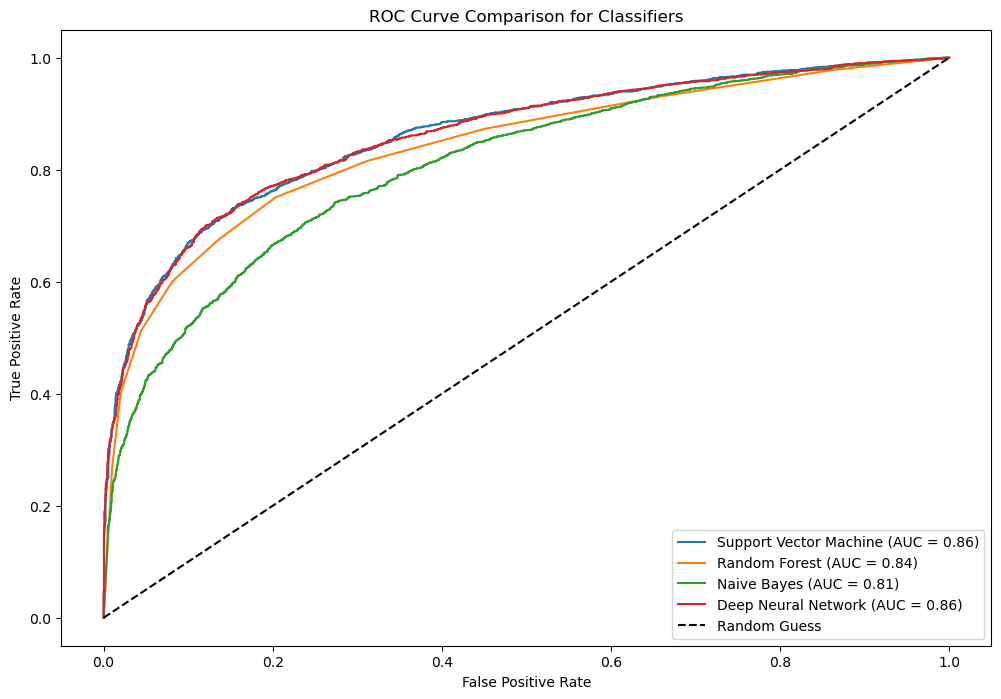

Maximal Significance (σ_S) for Support Vector Machine: 32.31


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Configure selected classifiers
classifiers = {
    "Support Vector Machine": SVC(kernel="linear", probability=True),  # Linear kernel for faster SVM
    "Random Forest": RandomForestClassifier(n_estimators=10, n_jobs=-1),  # Reduced estimators for faster processing
    "Naive Bayes": GaussianNB(),
    "Deep Neural Network": model_c  # Best-performing DNN from Exercise 3
}

X_Train_small, X_Test_small, y_Train_small, y_Test_small = train_test_split(X_Train, y_Train, test_size=0.1, random_state=42)

# Part B: Define Evaluation Function
def evaluate_classifier(clf, X_train, X_test, y_train, y_test, label):
    clf.fit(X_train, y_train) if isinstance(clf, (SVC, RandomForestClassifier, GaussianNB)) else None
    y_score = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.predict(X_test).ravel()
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    y_pred = (y_score > 0.5).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    Ns, Nb = tp + fn, tn + fp

    return roc_auc, Ns, Nb, (fpr, tpr)

# Initialize ROC data storage
roc_data = {}

# Evaluate each classifier
best_auc = 0
best_clf_data = None

plt.figure(figsize=(12, 8))
for label, clf in classifiers.items():
    print(f"Evaluating {label}...")
    roc_auc, Ns, Nb, (fpr, tpr) = evaluate_classifier(clf, X_Train_small, X_Test_small, y_Train_small, y_Test_small, label)
    roc_data[label] = (fpr, tpr, roc_auc, Ns, Nb)
    
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")
    
    # Update best classifier
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_clf_data = (label, Ns, Nb)

# Plot a random baseline
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve Comparison for Classifiers")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Part C: Calculate Maximal Significance
if best_clf_data:
    best_label, Ns, Nb = best_clf_data
    sigma_S = Ns / (Ns + Nb)**0.5
    print(f"Maximal Significance (σ_S) for {best_label}: {sigma_S:.2f}")
